#**INTRODUCTION**

Netflix is one of the most popular OTT services in the world, with over 220 million paying members. It is a streaming service that offers a diverse selection of TV shows, movies, anime, documentaries, and other entertainment. OTT platforms have expanded dramatically year after year by eliminating advertisements from their process workflow, thanks to the increasing availability of low-cost smartphones and high-quality internet access! Competition among streaming providers has been fierce as a result of the COVID - 19 lockdowns!In order to optimize client lifetime value, these platforms are racing to immerse as many people as possible in their services by giving a range of discounts, deploying ML recommender systems for content suggestion, and so on. Thus, understanding the process workflow via data lenses becomes crucial in order to make revenue! Client churn analysis, client acquisition cost, throughput, and other aspects must be analyzed on a regular basis in order to optimize existing systems for increased revenue and profitability! This dataset enables you to create a report using visualization techniques based on the insights gleaned from the tabular data, which contains both text and numerical data!

#**ABSTRACT**

We are working to determine the year a TV Show was released as well as the IMDB Ratings for all TV Shows.Netflix is a fast growing application in terms of popularity, programming, and content. This is a data-driven EDA with a content-based recommendation engine and a range of graphs and visualizations.

**DATA CLEANING**

The practice of repairing or deleting inaccurate, corrupted, improperly formatted, duplicate, or incomplete data from a dataset is known as data cleaning.


**FEATURE SELECTION**

Feature Selection is a technique for limiting the input parameter to your model by utilizing only relevant data and removing noise from the data. It is the technique of selecting suitable characteristics for your machine learning model automatically based on the sort of problem you are attempting to solve.

**DATA MODELLING**

The process of developing an informative model of relations between various types of information that will be kept in a database is known as data modeling.

**MODEL INTERPRETABILITY**

Models are interpretable when people can easily comprehend the logic behind the model's predictions and conclusions.

The more interpretable the models, the easier it is to understand and trust the model.

Deep learning and gradient boosting models, for example, are not interpretable and are referred to as black-box models because they are too sophisticated for human comprehension. A person cannot comprehend the complete model at once and understand the reasons behind each decision.


In [104]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 4.2 MB/s 
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
     |████████████████████████████████| 125 kB 31.3 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you have 

In [105]:
!pip install shap
!pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.0-cp38-cp38-manylinux2010_x86_64.whl (15.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.
eli5 0.13.0 requires jinja2>=3.0.0, but you have jinja2 2.11.3 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Importing Packages
import seaborn as sns
import math 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
from scipy.stats import norm, skew #for some statistics
from scipy import stats

In [107]:
from google.colab import files 
uploaded = files.upload()

Saving tv_shows.csv to tv_shows (1).csv


In [484]:
#Reading the Netflix TV shows dataset.
shows=pd.read_csv("/content/tv_shows.csv")

In [485]:
#Viewing data in the file.
shows.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


#**DATA CLEANING, PROCESSING & ANALYSIS**:

DATA TYPES

Datatypes used in this data set are int and object

In [486]:
#Viewing the datatypes used in this data-set.
shows.dtypes

Unnamed: 0          int64
ID                  int64
Title              object
Year                int64
Age                object
IMDb               object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object

MISSING DATA

In [487]:
#checking if the any data is missing
shows.isna().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                2127
IMDb                962
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

Yes, there are data missing from Age and IMDb columns, which means imputation of null values are from the data.

DROPPING IMDb DATA AS IT IS THE TARGET VARIABLE WHICH WE WILL PREDICT.

In [488]:
shows.dropna(subset=["IMDb"],inplace=True)
shows["IMDb"]= shows["IMDb"].str.extract('(\d+)').astype(float)
shows=shows.reset_index()

In [489]:
shows["Rotten Tomatoes"]= shows['Rotten Tomatoes'].str.extract('(\d+)').astype(float)

In [490]:
#Viewing unique values in Age 
shows.Age.value_counts()

16+    987
18+    852
7+     824
all    535
13+      9
Name: Age, dtype: int64

# Using Simple Imputer to impute the missing values in age

In [491]:
#import SimpleImputer
from sklearn.impute import SimpleImputer

#Fill with most frequent
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

shows_imputed=pd.DataFrame(simple_imputer.fit_transform(shows))
shows_imputed.columns=shows.columns
shows_imputed.index=shows.index

In [492]:
#New distribution after imputing
shows_imputed.Age.value_counts()

16+    2186
18+     852
7+      824
all     535
13+       9
Name: Age, dtype: int64

In [493]:
#Dropping ID and Title column as it is not required to predict
shows.drop(columns=["Unnamed: 0","ID","Title","index"],inplace=True)
shows['Age']=shows_imputed['Age'].copy()

In [494]:
#Dropping Type column as it has only 1 as values.
shows.drop(columns=["Type"],inplace=True)

#**Distribution of Predictor Variables**

CATEGORICAL VARIABLES

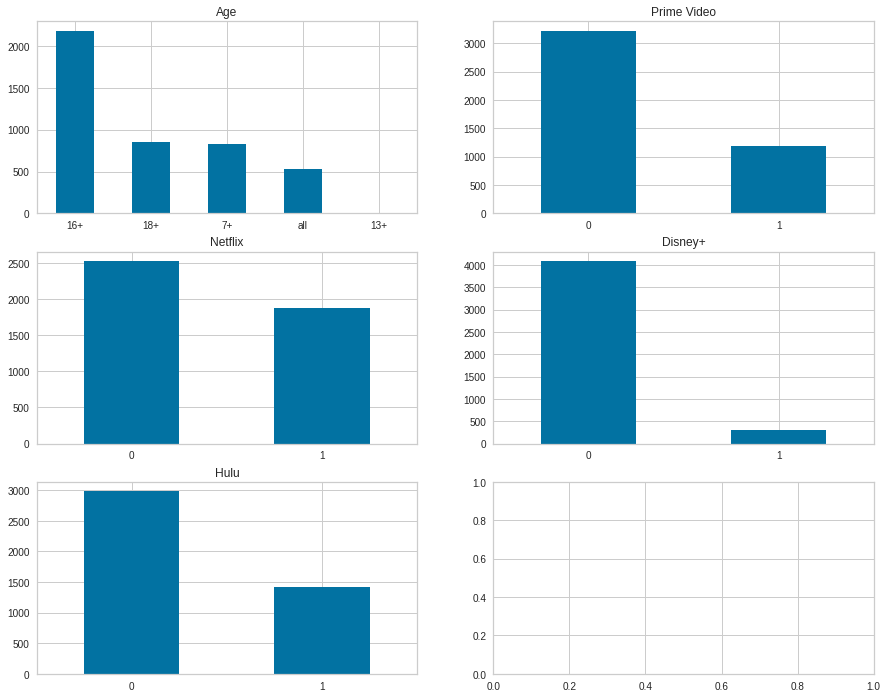

In [495]:
features = ["Age", "Netflix","Hulu","Prime Video","Disney+"]

fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (15,12))
for i, item in enumerate(features):
    if i < 3:
        ax = shows[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = shows[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
    ax.set_title(item)

# NUMERIC VARIABLES

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59ac9fad90>]],
      dtype=object)

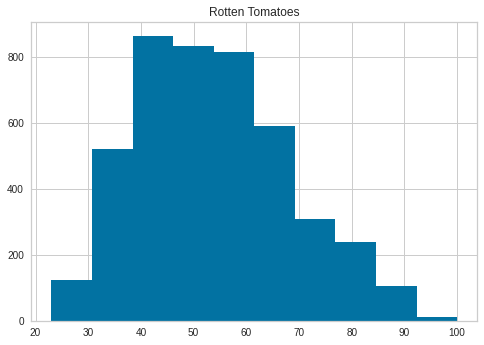

In [496]:
#Checking distribution of the independent variable and Plotting Histogram for the same "Rotten Tomatoes"
shows.hist(column='Rotten Tomatoes')

# IDENTIFYING PREDICTOR SIGNIFICANCE

In [497]:
shows_df=pd.get_dummies(shows)

In [498]:
#Viewing the correlation between every single features in the data.
shows_df.corr()

,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Age_13+,Age_16+,Age_18+,Age_7+,Age_all
Year,1.000000,-0.078007,-0.053704,0.321571,-0.166875,-0.249531,-0.022549,-0.024231,0.098676,0.154813,-0.133063,-0.176045
IMDb,-0.078007,1.000000,0.448134,0.010247,-0.000182,0.039963,-0.016347,-0.012100,0.002325,0.085617,-0.022455,-0.078606
Rotten Tomatoes,-0.053704,0.448134,1.000000,0.073390,0.188228,-0.152755,-0.026043,0.001302,-0.182642,0.305124,0.046991,-0.145643
Netflix,0.321571,0.010247,0.073390,1.000000,-0.470106,-0.414438,-0.219235,-0.008439,-0.003916,0.137647,-0.064347,-0.082460
Hulu,-0.166875,-0.000182,0.188228,-0.470106,1.000000,-0.259222,-0.125161,0.033394,0.001429,-0.017470,0.073271,-0.073152
Prime Video,-0.249531,0.039963,-0.152755,-0.414438,-0.259222,1.000000,-0.162052,-0.004702,0.053851,-0.083747,-0.014523,0.036818
Disney+,-0.022549,-0.016347,-0.026043,-0.219235,-0.125161,-0.162052,1.000000,-0.012554,-0.137927,-0.131402,0.113160,0.236667
Age_13+,-0.024231,-0.012100,0.001302,-0.008439,0.033394,-0.004702,-0.012554,1.000000,-0.044894,-0.022152,-0.021699,-0.016819
Age_16+,0.098676,0.002325,-0.182642,-0.003916,0.001429,0.053851,-0.137927,-0.044894,1.000000,-0.485858,-0.475937,-0.368904
Age_18+,0.154813,0.085617,0.305124,0.137647,-0.017470,-0.083747,-0.131402,-0.022152,-0.485858,1.000000,-0.234835,-0.182023


Rotten Tomatoes is highly co-related with our target variable IMDb

# BOX PLOT

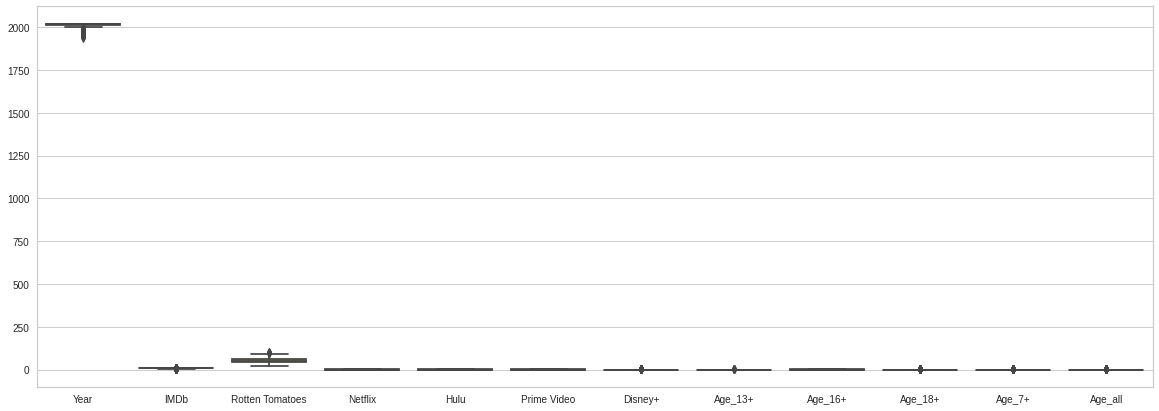

In [499]:
plt.figure(figsize=(20,7))
sns.boxplot(data=shows_df)

In [500]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler() # Normalization
shows_df['Rotten Tomatoes']= mms.fit_transform(shows_df[['Rotten Tomatoes']])
shows_df['Year']= mms.fit_transform(shows_df[['Year']])

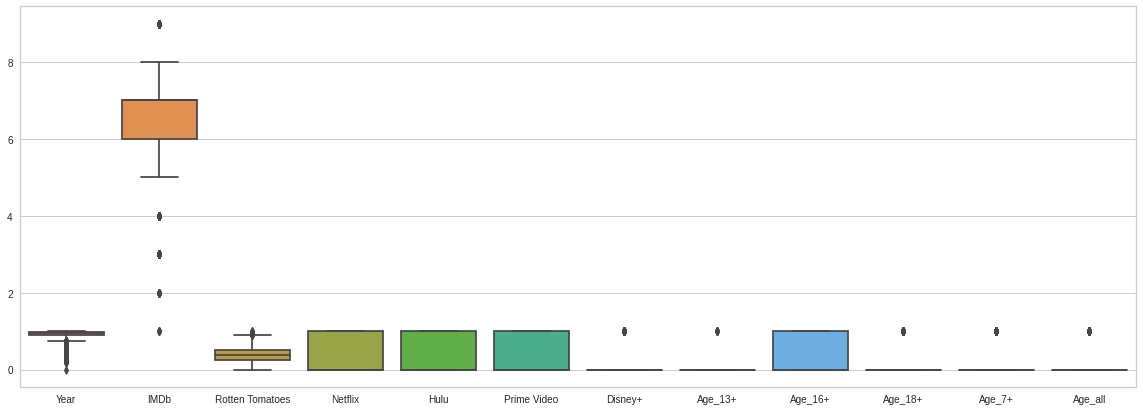

In [501]:
plt.figure(figsize=(20,7))
sns.boxplot(data=shows_df)

In [502]:
Q1 = shows_df["Rotten Tomatoes"].quantile(0.25)
Q3 = shows_df["Rotten Tomatoes"].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (shows_df["Rotten Tomatoes"] >= Q1 - 1.5 * IQR) & (shows_df["Rotten Tomatoes"] <= Q3 + 1.5 *IQR)
shows_df=shows_df[filter]  

In [503]:
Q1 = shows_df["Year"].quantile(0.25)
Q3 = shows_df["Year"].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (shows_df["Year"] >= Q1 - 1.5 * IQR) & (shows_df["Year"] <= Q3 + 1.5 *IQR)
shows_df=shows_df[filter]  

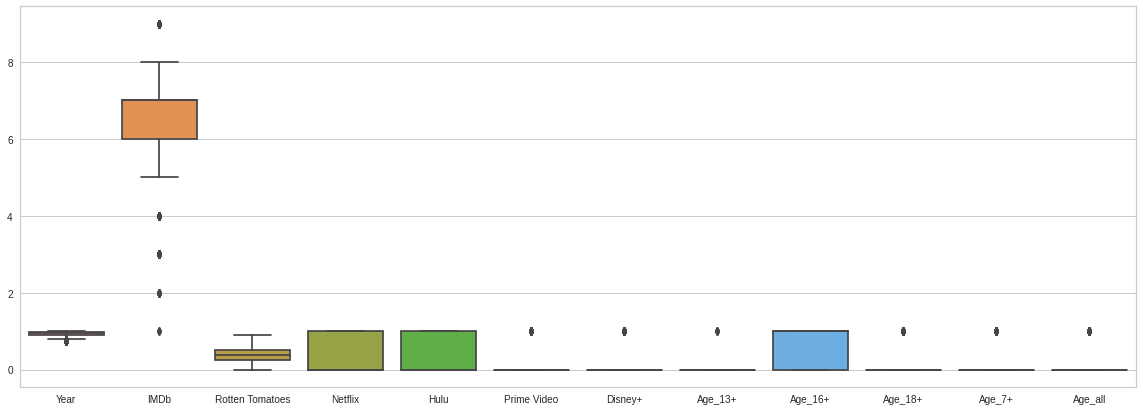

In [504]:
plt.figure(figsize=(20,7))
sns.boxplot(data=shows_df)

In [507]:
Y=shows_df["IMDb"].values
X=shows_df.drop(columns=['IMDb'])

# USING OLS REGRESSION

In [509]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm
model = sm.OLS(Y, X).fit()

#Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     112.6
Date:                Fri, 16 Dec 2022   Prob (F-statistic):          3.61e-207
Time:                        03:32:53   Log-Likelihood:                -5852.7
No. Observations:                4042   AIC:                         1.173e+04
Df Residuals:                    4031   BIC:                         1.180e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Year               -0.2234      0.311     -0.719      0.472      -0.833       0.386
Rotten Tomatoes     3.0680      0.097     31.756      0.000       2.879       3.257
Netflix            -0.0802      0.063     -1.282      0.200      -0.203       0.042
Hulu               -0.2354      0.062     -3.810      0.000      -0.356      -0.114
Prime Video         0.1500      0.063      2.399      0.016       0.027       0.273
Disney+            -0.0261      0.085     -0.306      0.760      -0.194       0.141
Age_13+             5.3247      0.463     11.510      0.000       4.418       6.232
Age_16+             5.7928      0.306     18.926      0.000       5.193       6.393
Age_18+             5.5517      0.312     17.769      0.000       4.939       6.164
Age_7+              5.5763      0.304     18.371      0.000       4.981       6.171
Age_all             5.6134      0.302     18.583      0.000       5.021       6.206
==============================================================================
Omnibus:                      448.257   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              798.114
Skew:                          -0.747   Prob(JB):                    4.92e-174
Kurtosis:                       4.583   Cond. No.                         62.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will use the significance threshold for p-value 0.05 as predicting IMDb rating is not that critical

The P values of all the features are less than 0.5 except Disney+, which means they are significant in predicting the IMDb rating

In [510]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

# Creating Train & Test Splits

Checking the distribution of data in train and test sets

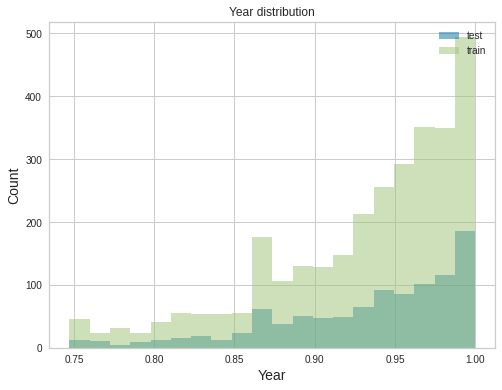

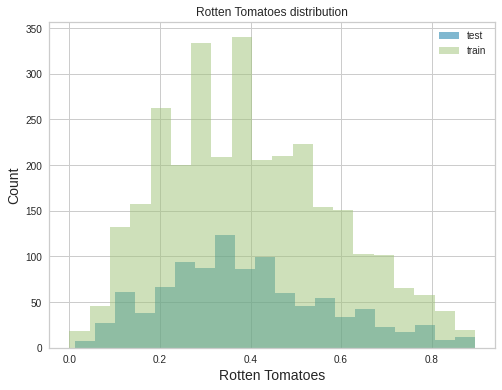

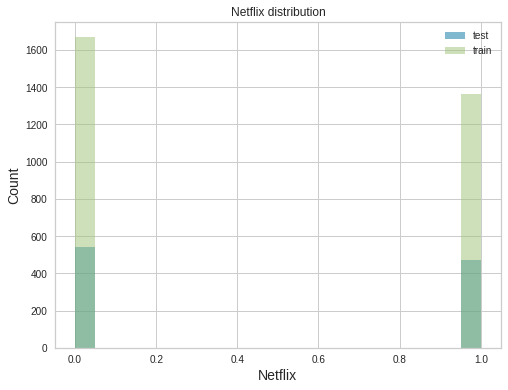

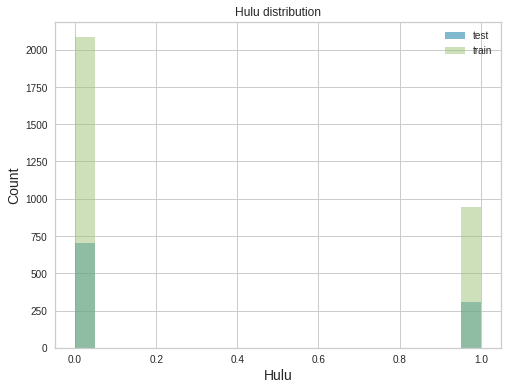

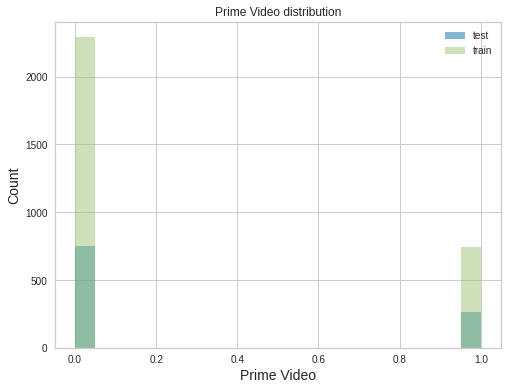

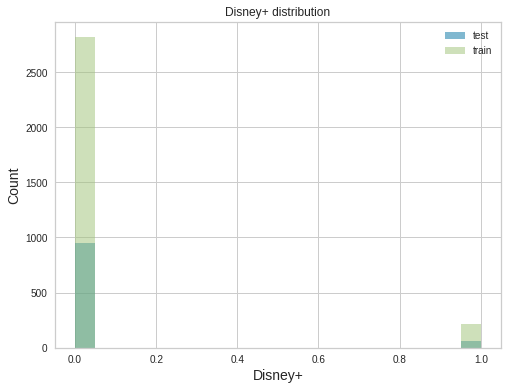

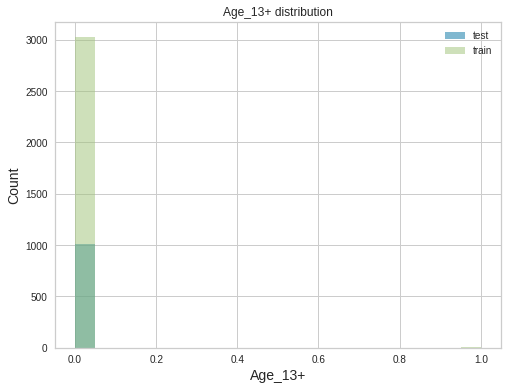

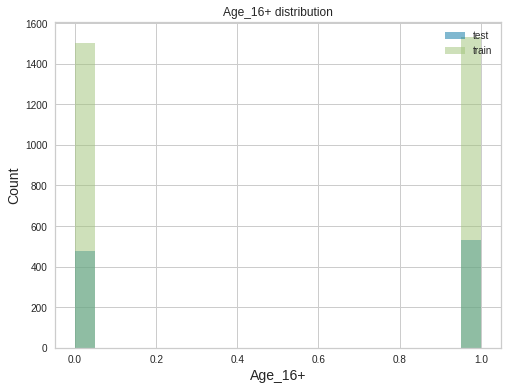

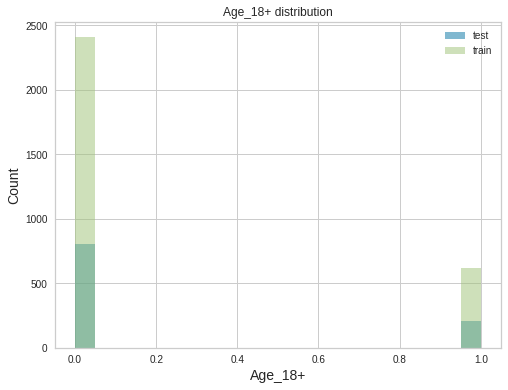

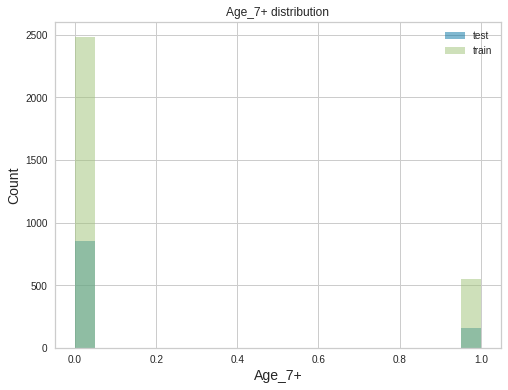

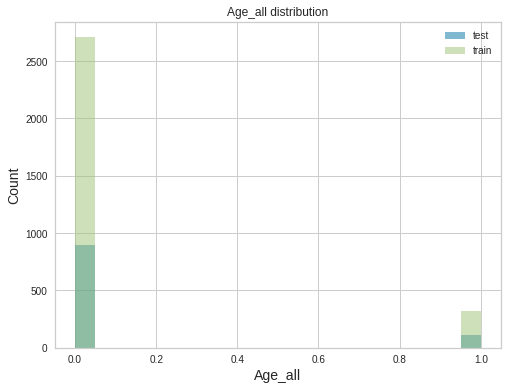

In [511]:
# Looking the data for test and training the set
X_test_plot = X_test.copy()

X_train_plot = X_train.copy()

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

## MODELLING

# LINEAR REGRESSION

In [435]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)
# Make predictions using the training set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 1.01
Coefficient of determination: 0.22
R^2 score on test set = 0.2202438559608515


In [437]:
print(regr.intercept_)

5.952205553855852


In [372]:
coef=pd.DataFrame(zip(X_train.columns, np.transpose(regr.coef_)), columns=['features', 'coef']).sort_values(by=['coef'])

In [373]:
coef.sort_values(by="coef")

,features,coef
0,Year,-0.062048
3,Hulu,-0.038922
2,Netflix,-0.014551
9,Age_7+,-0.013786
8,Age_18+,-0.010849
10,Age_all,-0.007045
5,Disney+,-0.004814
6,Age_13+,0.012600
4,Prime Video,0.012746
7,Age_16+,0.019081


The features that assist forecast the IMDb are Disney+, Prime Video, Netflix, Rotten Tomatoes, and Age groupings.

## DECISION TREE

In [374]:
from sklearn.tree import DecisionTreeRegressor #Import Decision Tree Regressor

# Create Decision Tree Regressor object
dt = DecisionTreeRegressor(max_depth=5)

# Train Decision Tree Regressor
dt = dt.fit(X_train,y_train)

#PredICT for test dataset
y_pred = dt.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

r2 = r2_score(y_test,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.02
Coefficient of determination: 0.20
R^2 score on tarining set = 0.20214795258495544


# INTERPRETING THE NODES OF THE DECISION TREE

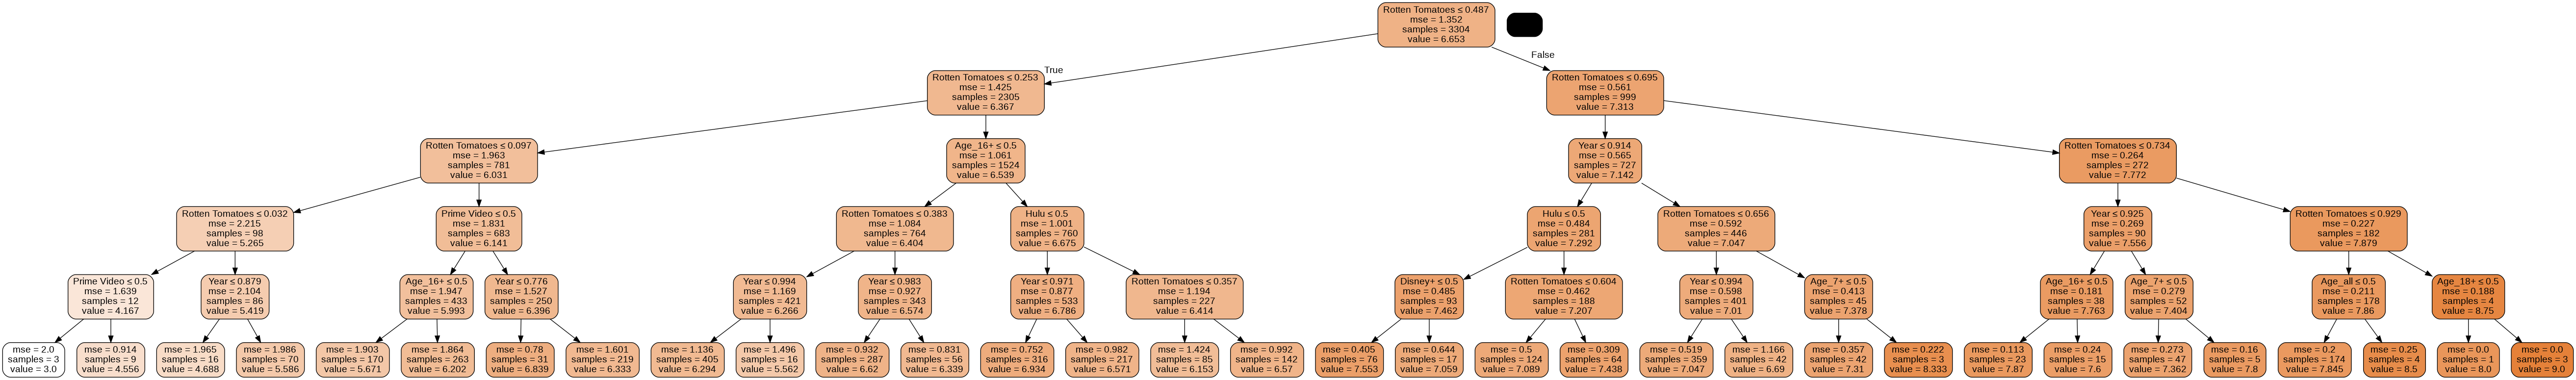

In [252]:
from six import StringIO
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# **AUTOML- Pycaret Library to Select and tune the best Model**

In [253]:
# importing classification
from pycaret.classification import *

In [254]:
from pycaret.regression import *

In [596]:
shows

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,2008,18+,9.0,100.0,1,0,0,0
1,2016,16+,8.0,96.0,1,0,0,0
2,2013,18+,9.0,95.0,1,1,0,0
3,2015,18+,8.0,94.0,1,0,0,0
4,2017,16+,8.0,93.0,1,0,0,0
...,...,...,...,...,...,...,...,...
4401,2018,7+,7.0,30.0,0,0,0,1
4402,2018,all,3.0,30.0,0,0,0,1
4403,2020,all,5.0,29.0,0,0,0,1
4404,2018,all,7.0,28.0,0,0,0,1


# **Setting Up The Classifier**

In [597]:
reg = setup(data = shows, 
            target = 'IMDb',
            normalize=True,
            normalize_method='minmax',
            remove_multicollinearity=True,
            fold=3,
            transform_target=True,
            silent = True)

,Description,Value
0,session_id,4456
1,Target,IMDb
2,Original Data,"(4406, 8)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3084, 11)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='IMDb',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('dummy', Dummify(target='IMDb')),
                ('fix_perfect', Remove_100(target='IMDb')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough

# **Model Comparison & Evaluation**

In [598]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.7594,1.0430,1.0206,0.2353,0.1587,0.1421,0.2200
huber,Huber Regressor,0.7732,1.0676,1.0327,0.2168,0.1601,0.1440,0.0500
lr,Linear Regression,0.7751,1.0732,1.0354,0.2127,0.1607,0.1450,1.1633
lar,Least Angle Regression,0.7751,1.0732,1.0354,0.2127,0.1607,0.1450,0.0300
ridge,Ridge Regression,0.7754,1.0744,1.0360,0.2118,0.1609,0.1451,0.0300
br,Bayesian Ridge,0.7755,1.0745,1.0361,0.2118,0.1609,0.1451,0.0267
lightgbm,Light Gradient Boosting Machine,0.7717,1.0907,1.0436,0.2005,0.1609,0.1431,0.4433
omp,Orthogonal Matching Pursuit,0.7912,1.1072,1.0517,0.1878,0.1630,0.1480,0.0267
ada,AdaBoost Regressor,0.8015,1.1197,1.0576,0.1787,0.1646,0.1514,0.1100
knn,K Neighbors Regressor,0.8311,1.2283,1.1078,0.0985,0.1686,0.1520,0.0567


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                           

# **Creating a Model**

In [599]:
lgbm=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7690,1.0660,1.0325,0.2002,0.1554,0.1370
1,0.8148,1.2025,1.0966,0.1804,0.1720,0.1567
2,0.7313,1.0034,1.0017,0.2209,0.1552,0.1356
Mean,0.7717,1.0907,1.0436,0.2005,0.1609,0.1431
Std,0.0341,0.0831,0.0395,0.0165,0.0079,0.0096


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=4...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                  

# **Hyperparameter Tuning**

A hyperparameter is a parameter that is used to modify the behavioral pattern of a machine-learning model. Its tuning entails determining a set of ideal hyperparameter variables for a training algorithm and then applying the optimized algorithm to any data collection.

In [600]:
tuned_model = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7815,1.0711,1.0350,0.1964,0.1570,0.1411
1,0.7998,1.1598,1.0770,0.2095,0.1710,0.1562
2,0.7356,0.9870,0.9935,0.2337,0.1553,0.1378
Mean,0.7723,1.0726,1.0351,0.2132,0.1611,0.1450
Std,0.0270,0.0706,0.0341,0.0154,0.0071,0.0080


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:PowerTransformedTargetRegressor(bagging_fraction=1.0, bagging_freq=3,
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.6,
                                importance_type='split', learning_rate=0.05,
                                max_depth=-1, min_child_samples=100,
                                min_child_weight=0.001, min_split_gain=0.5,
                                n_estimators=120, n_jobs=-1, num_leaves=70,
                                objective=None,
                                power_transformer_method=...
                                                        importance_type='split',
                                                        learning_rate=0.05,
                                                        max_depth=-1,
                                

In [601]:
#Installing support library
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Model Interpretability using SHAP**

 SHAP: It is a mathematical framework for explaining machine learning model predictions. It is based on game theory ideas and may be used to explain any machine learning model's predictions by computing the contribution of each attribute to the prediction.

In [602]:
import shap

In [603]:
data=reg[6][1][1]

In [604]:
X100 = shap.utils.sample(data, 100) # 100 instances for use as the background distribution
sample_ind = 20

# **Interpret Model using SHAP**

In [605]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(tuned_model.predict, X100)
shap_values = explainer(X)

Permutation explainer: 4043it [18:52,  3.56it/s]


# **Interpreting the SHAP values**

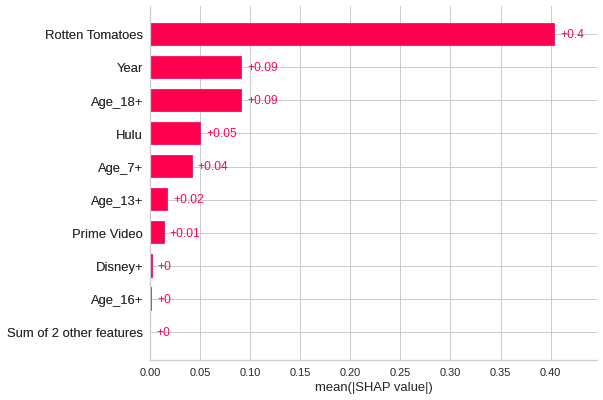

In [607]:
shap.plots.bar(shap_values)

The average SHAP values of each individual characteristic are displayed.

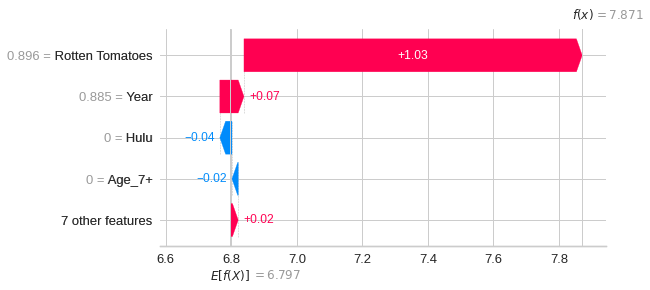

In [608]:
shap.plots.waterfall(shap_values[0], max_display=5)

In this example, we plot an example to illustrate how the predictor variables influence the chance of an IMBd IMDb score increasing by +1.8 as Rotten Tomatoes plays a significant effect.

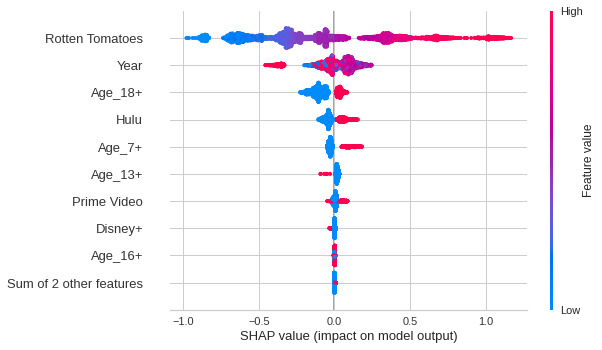

In [609]:
shap.plots.beeswarm(shap_values)

In a tract called Beeswarm,

Every instance of the dataset shows as its own point for each variable, and the points are spread over the x-axis based on their SHAP values. The input variables are ordered from top to bottom based on their mean SHAP values. The most prominent feature here is Rotten Tomatoes.
As rotten tomatoes rating increases IMDB increases.


# Interpreting Best Model using SHAP

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=PowerTransformedTargetRegressor(bagging_fraction=1.0, bagging_freq=3,
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.6,
                                importance_type='split', learning_rate=0.05,
                                max_depth=-1, min_child_samples=100,
                                min_child_weight=0.001, min_split_gain=0.5,
                                n_estimators=120, n_jobs=-1, num_leaves=70,
                                objective=None,
                                power_transformer_method=...
                                                        importance_type='split',
                                                        learning_rate=0.05,
                                                        max_depth=-1,
                                                        min_child_samp

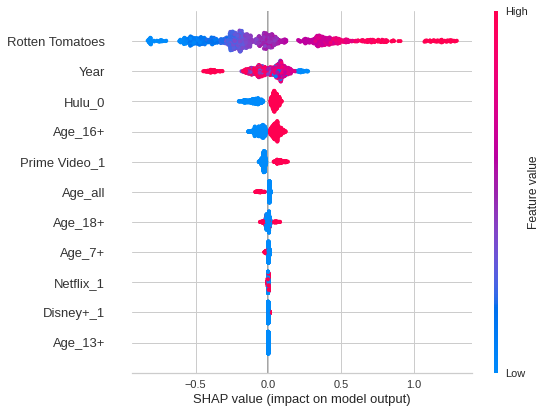

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [610]:
interpret_model(tuned_model)

# CONCLUSION:
On the data set tv shows, we used a linear model and evaluated the regression coefficients. To choose and refine the best model, we utilized a decision tree regressor and AutoML. We used SHAP which was utilized to determine the influence of specific attributes.



# LICENSE:
Copyright (c) 2022 yadavadit

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# 1. What is the question?

Ans: The challenge is how to deal with the data, including data cleaning, feature selection, modeling, and model interpretability, to obtain correct IMDb ratings for the supplied TVshows based on several factors such as age, rotten tomatoes, year, and the platforms the TVshows are displayed on.


# 2. What did you do?

Ans: After selecting the data set, I removed the unwanted variables such as index and IMDb, focusing more on other attributes such as year, rotten tomatoes, and so on. Later, I identified the predictor significance by viewing the correlation between every single feature in the data, which revealed that rotten tomatoes are highly co-related with our target variable IMDb. To check for important features, I utilized OLS to get the p value.I also worked on the BOX Plot, removing outliers.
Finally, I worked on Linear Regression, which yielded Mean squared error: R2 score on test set = 0.2202438559608515 and regr = 5.952205553855852
Disney+, Prime Video, Netflix, Rotten Tomatoes, and Age Groupings are some of the features that help forecast the IMDb.In the end we worked with the SHAP to determine the end result.

In the Data Cleaning and Feature Selection section



*   Missing values were handled
*   Predictor distribution was examined.
*   The numerical variables have been scaled.
*   Important predictive factors have been identified.
*   Outlier identification and treatment were carried out.


#3. How well did it work?

Ans: It showed good accuracy with different models mentioned above.


#4. What did you learn?

Ans: I learnt how to identify the accurate elements that provide the greatest IMDb ratings results. I learnt to work on Data, including data cleaning, feature selection, modeling, and model interpretability, to obtain correct IMDb ratings for the supplied TVshows based on several factors
